# Analyzing the Hashtag #BLM on Twitter Through a Peircean Framework

## Introduction

In February 2012, Trayvon Martin – an unarmed Black teenager – was shot dead by George Zimmerman. 17 months later in July 2013, a jury found Zimmerman not guilty of second-degree murder and acquitted of manslaughter.<sup>1</sup>  The injustice motivated the use of the hashtag #BlackLivesMatter (alongside the abbreviated version #BLM). The hashtag, and movement, gained national attention following the murders of Michael Brown Jr. in Missouri and Eric Garner in New York City at the hands of police officers Darren Wilson, Daniel Pantaleo, and Justin D’Amico in 2014.<sup>2</sup>  Momentum behind the social movement surged again six years later following the murder of George Floyd in Minneapolis, where police officer Derek Chauvin knelt on Floyd’s neck for nearly 10 minutes. Floyd’s death prompted between 15 million and 26 million individuals to protest in 2020. These murders represented specific instances of police violence against Black people in the United States, and engendered more protests responding to the different forms of violence towards Black people across the country. For example, Oluwatoyin Salau, a 19-year-old woman, was raped and murdered by Aaron Glee Jr.<sup>3</sup> the summer of 2020. Breonna Taylor was murdered in her apartment while she slept by officers Jonathan Mattingly, Brett Hankinson, and Myles Cosgrove. These acts of violence underscored the intersectionality between race, ethnicity, and gender as Salau and Taylor's deaths symbolized a larger pattern where the deaths of Black women are largely ignored by the media relative to the amount of coverage for Black men. Companies also began taking a stance on political issues, prompting questions about performative activism<sup>4</sup>  where the desire for increased social capital (or plain profits) fuels a disingenuity behind activism. 

The murders of Michael Brown Jr., Eric Garner, and George Floyd by police officers suggests that the social movement centers on criminal justice reform, while the killings of Oluwayotyin Salau and Breonna Taylor highlight the silencing and erasure of Black women in addition to police brutality, and corporate activism reveals how capitalism co-opts social movements, which ultimately upholds the status quo at the cost of continued oppression for Black communities. 

These different – albeit related – meanings, present an opportunity to bridge Peircean semiotics and computational methods to examine how the sign-vehicle #BLM is used and whether its objects and interpretations remain consistent. Before continuing, I am going to caveat that Charles Sanders Peirce likely doesn’t believe a sign-vehicle is limited to one interpretation. I bring up Peirce’s thought in this context to communicate that I am not restricting the BlackLivesMatter movement to one interpretation. I am not saying that BlackLivesMatter can only be about criminal justice reform nor am I saying that the movement must overthrow capitalism. The events highlighted above are all representative of the many manifestations of violence to which the movement resists. However, for the purposes of this study, I am interested in uncovering the dominant meanings and usage of BlackLivesMatter.

Put formally, I ask, how do #BLM Twitter conversations in 2016 compare to discourse during the summer of 2020?

## Does #blm exemplify a cultural pattern? 

Before diving deeper into the Twitter data, I will explain how usage of the hashtag #BLM represents a cultural pattern. 

First, to define culture, I elaborate upon the frameworks provided by Raymond Williams and Charles Sanders Peirce. For Williams, culture is “a particular way of life which expresses certain meanings and values not only in art and learning but also in institutions and ordinary behavior. The analysis of culture, from such a definition, is the clarification of meanings and values implicit and explicit in particular ways of life, a particular ‘culture’.<sup>5</sup>  In short, culture refers to a set of actions, practices, and language that has a shared meaning for those individuals who act, practice, and communicate. We can extend this thought into a Peircean framework. Peirce was interested in studying legisigns for which he defines as “a law that is a Sign. This law is usually established by men. Every conventional sign is a legisign [but not conversely]…Every legisign signifies through an instance of its application which may be termed a Replica of it.”<sup>6</sup>  Keeping Williams and Peirce in mind then, I define culture as a constructed meaning that is established by convention and rules. The replication of these conventions and rules lead to a shared meaning and understanding of how practices and language function. 

With this definition in mind, if the hashtag #BLM is a pattern, then I would expect the hashtag to be replicated according to some rule or law so that its meaning is established through convention. In short, the hashtag needs to be used the same way across contexts. 

To use data in establishing the hashtag #BLM as a cultural pattern, I turn to Google Trends. 

*Import libraries.*

In [1]:
import datetime
import gensim
from gensim import corpora
from gensim import models
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer
import pandas as pd
from pprint import pprint
import re
import string
import pyLDAvis
import pyLDAvis.gensim
import warnings

pd.options.display.max_columns = None  # Shows all columns of a dataframe in Jupyter Notebook
warnings.filterwarnings('ignore')  # Supress warnings from being displayed

*Define a function to load in and clean up Google Trends data.*

In [2]:
def load_trend_data(path):
    """Returns Black Lives Matter trend data from Google Trends as dataframe."""

    df = pd.read_csv(path)
    
    # Splice data to only include rows containing days
    df = df.loc['2012-01':'2021-01']
    
    # Rename columns to more easily work with data
    df.rename(columns={'Category: All categories': 'Frequency'}, inplace=True)
    
    # Ensure that we have numeric data for plotting
    df['Frequency'] = (df['Frequency'].str.replace('<', '')
                                      .astype(int))
    
    # Turn index into date time data type for plotting
    df.index = pd.to_datetime(df.index, errors='coerce')

    return df 

*Load in data and print out first five rows to see what the data look like.*

In [3]:
TREND_PATH = '/Users/danielchen/Desktop/UChicago/Year Two/Winter 2021/Computation and the Identification of Cultural Patterns/Final Project/Data/BLM Google Trends.csv'
blm_trend = load_trend_data(path=TREND_PATH)
blm_trend.head()

,Frequency
2012-01-01,1
2012-02-01,0
2012-03-01,1
2012-04-01,1
2012-05-01,1


Define a function to plot the Google Trends data.

In [5]:
def plot_trend_data(dataframe):
    """Returns plot visualizing interest in BLM from 2012 to 2021 with
    flags indicating key events.
    """
    
    df = dataframe.copy()
    
    # Create figure and axis object and plot data on that figure/axis
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(df.index, df.Frequency)

    # Label y-axis and add title
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Interest in Black Lives Matter via Google Trends 2012 - 2020\n\n', 
              fontweight='bold', fontsize=16)

    # Remove spines to clean up chart junk
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add vertical lines and text labels to mark pivotal events
    ax.axvline(datetime.datetime(2013, 7, 13), color='k', linestyle=':')
    ax.text(datetime.datetime(2013, 7, 28), 100,
            'George Zimmerman \n'
            'aquitted (7/13) ',
            horizontalalignment='left',
            style='italic',
            fontsize=9)
    ax.axvline(datetime.datetime(2014, 7, 17), ymin=0, ymax=.95, 
               color='k', linestyle=':')
    ax.text(datetime.datetime(2014, 7, 28), 98,
            'Eric Garner killed (7/17)',
            horizontalalignment='left',
            style='italic',
            fontsize=9)
    ax.axvline(datetime.datetime(2014, 8, 9), ymin=0, ymax=.85, 
               color='k', linestyle=':')
    ax.text(datetime.datetime(2014, 8, 25), 85,
            'Michael Brown \n' 
            ' killed (8/9)',
            horizontalalignment='left',
            style='italic',
            fontsize=9)
    ax.axvline(datetime.datetime(2015, 7, 17), ymin=0, ymax=.90, 
               color='k', linestyle=':')
    ax.text(datetime.datetime(2015, 7, 28), 88,
            ' Sandra Bland \n '
            'found dead \n '
            '(7/15)',
            horizontalalignment='left',
            style='italic',
            fontsize=9)
    ax.axvline(datetime.datetime(2016, 7, 1), color='k', linestyle=':')
    ax.text(datetime.datetime(2016, 7, 15), 100,
            ' Alton Sterling killed (7/5) \n '
            'Philando Castile killed (7/6)',
            horizontalalignment='left',
            style='italic',
            fontsize=9)
    ax.axvline(x=datetime.datetime(2017, 8, 1), ymin=0, ymax=.90, 
              color='k', linestyle=':')
    ax.text(datetime.datetime(2017, 8, 15), 90,
            ' Unite the right rally \n'
            ' (8/11 - 8/12)',
            horizontalalignment='left',
            style='italic',
            fontsize=9)
    ax.axvline(x=datetime.datetime(2020, 5, 25), color='k', linestyle=':')
    ax.text(datetime.datetime(2020, 6, 1), 100,
            ' George Floyd killed \n'
            ' (5/25)',
            horizontalalignment='left',
            style='italic',
            fontsize=9)

    plt.show();

*Display line plot.*

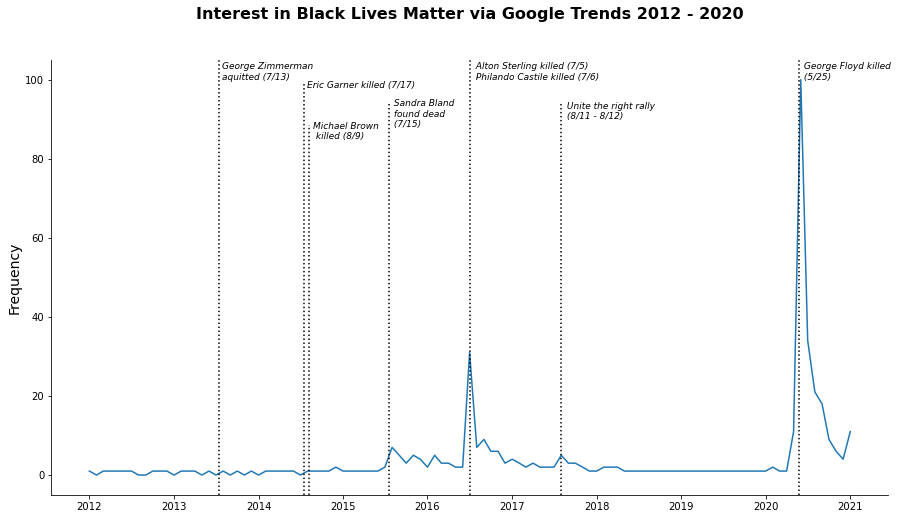

In [6]:
plot_trend_data(blm_trend)

From the plot<sup>7</sup>  above, there’s evidence that interest in Black Lives Matter typically follows the death of Black people in the United States. There was a spike after Sandra Bland was found hanged in a Texas jail cell, after Alton Sterling, Philando Castile, and George Floyd were murdered in Louisiana, Missouri, and Minnesota. Notably, there was a small bump upwards in interest following a White supremacist rally in August of 2017. The hashtag and is time invariant. In other words, the plot provides evidence of a cultural pattern because its usage had a shared meaning over the past decade. The hashtag is consistently used in response to Black deaths involving police officers. 

While the temporal dimension suggests that the sign-vehicle is consistently being used across time, I am also interested in looking at the sign-vehicle's usage across space. As mentioned in Dr. Clindaniel's forthcoming book,<sup>8</sup> it's also important to look at how a sign-vehicle is being used across contexts. If the sign-vehicle is replicated in one location one way, but replicated differently in a different location, we may be skeptical as to whether or not our legisign is conventionalized across geographic boundaries.

Here I load in a data set containing 389,000 tweets that contain the hashtag #BLM (in the next section, I will go into more detail about how I retrieved the data). Using coordinate data, I plot red dots on a map of the Earth to signify the Twitter user's location conditional on their tweet containing the sign-vehicle, #BLM.

*Define function to load the BLM Twitter data.*

In [7]:
def data_loader(path):
    """Loads in BLM Tweets."""

    df = pd.read_csv(path, low_memory=False)
    
    return df

In [8]:
TWITTER_PATH = '/Users/danielchen/Desktop/UChicago/Year Two/Winter 2021/Computation and the Identification of Cultural Patterns/Assignment 2/Data/blm_tweets_389k.csv'
blm = data_loader(path=TWITTER_PATH)
blm.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Fri Jul 15 17:06:28 +0000 2016,BlackLivesMatter,https://twitter.com/TheWire985/status/75399918...,http://buff.ly/29I1p76,1,753999182835412993,NaN,NaN,NaN,en,NaN,False,1,NaN,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",How Black Radio Hurts #BlackLivesMatter https:...,https://twitter.com/TheWire985/status/75399918...,Sun Apr 03 19:07:21 +0000 2016,TheWire985,False,"FM Radio: Music-Talk. Hip-Hop, R&B, and Timele...",109,306,123,16,Orlando,The Wire 98.5,TheWire985,79016,NaN,http://www.TheWire985.com,False
1,NaN,Fri Jul 15 17:12:17 +0000 2016,blacklivesmatter,NaN,http://chi.mg/29UAAkx,0,754000645536047104,NaN,NaN,NaN,en,NaN,False,0,NaN,NaN,"<a href=""http://mobile.twitter.com"" rel=""nofol...","Incredible, incredible girls!! How 4 Teenage G...",https://twitter.com/Womens_Wire/status/7540006...,Fri Apr 04 05:48:22 +0000 2014,Womens_Wire,False,A platform for the voices and activism of inte...,13307,585,619,38,United States,Women's Wire,Womens_Wire,10666,NaN,https://www.womenswiremedia.org/,False
2,NaN,Fri Jul 15 17:11:43 +0000 2016,BlackLivesMatter,NaN,https://twitter.com/pj1017__/status/7539991226...,0,754000504775118848,NaN,NaN,NaN,und,NaN,False,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",#BlackLivesMatter 😂😂 https://t.co/tT8lxhw8sF,https://twitter.com/BigP____/status/7540005047...,Sun Oct 10 12:01:58 +0000 2010,BigP____,False,Rest in Peace Quwan Forever My Brother,1043,2925,1365,7,With Jb ✌,Sosa mommy,BigP____,99467,NaN,NaN,False
3,NaN,Fri Jul 15 17:14:08 +0000 2016,blacklivesmatter,NaN,NaN,0,754001110394806272,NaN,NaN,NaN,en,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",You cannot link arms under a universalist bann...,https://twitter.com/casbahgal/status/754001110...,Wed Oct 24 18:13:57 +0000 2012,casbahgal,False,"Sociology Professor to some, Mom to those few :)",3045,65,220,10,NaN,Denise,casbahgal,1449,NaN,NaN,False
4,NaN,Fri Jul 15 17:12:53 +0000 2016,alllivesmatter blacklivesmatter,NaN,NaN,1,754000798133084160,NaN,NaN,NaN,en,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",If I ever go on a real first date my first que...,https://twitter.com/SixFootShawty/status/75400...,Sun Apr 05 22:26:16 +0000 2015,SixFootShawty,False,2 Corinthians 5:17 | Towson Alumna | BGM✨,28319,417,397,5,In Christ,Omolere,SixFootShawty,33338,NaN,NaN,False


In [9]:
def location_plotter(dataframe):
    """Takes in the BLM Twitter dataframe and returns a map showing Tweet location data."""
    
    df = dataframe.copy()
    
    # Only include rows where data is not missing
    df = df[df['coordinates'].isna() == False]
    
    # Split coordinates column into separate lat. + long. columns
    df['X'] = [coordinate.split(',')[0] for coordinate in df['coordinates']]
    df['Y'] = [coordinate.split(',')[1] for coordinate in df['coordinates']]
    
    # Turn BLM Tweet dataframe into a geopandas dataframe object
    gdf = GeoDataFrame(df, geometry=gpd.points_from_xy(df['X'], df['Y']))
    
    # Plot points on world map 
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = gdf.plot(ax=world.plot(figsize=(12, 12)), marker='o', color='red', markersize=11)
    
    # Remove axes and add title
    ax.axis('off')
    ax.set_title('Locations of Tweets Containing #BLM', fontweight='bold', fontsize=14);

*Display map.*

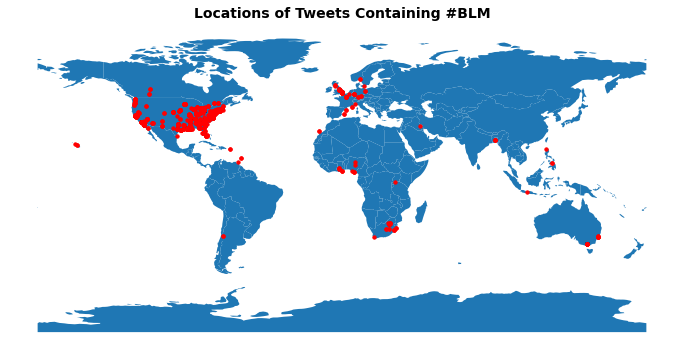

In [10]:
location_plotter(blm)

The lineplot and map - in conjunction - suggest that we have identified a legisign that is conventionalized across time and regions. The data suggest not only that users are tweeting the hashtag following acts of police brutality, but Twitter users are also consistently using the sign-vehicle in different locations as well. Interestingly, it appears that there are tweets from across the entire globe, though it makes sense that tweets are concentrated within the United States. Of course, I'll have to dig deeper to analyze the content of the tweets.

## Identifying the Sign Relationships

As a reminder, in my introduction I mentioned that the hashtag #BLM could reference an umbrella of violence against Black people in the United States, which includes police brutality, the erasure of Black women, or an exploitative capitalist system. For a moment, I’ll assume that #BLM exclusively refers to a stance against police brutality. If this is true then I expect the following sign-vehicle, object, and interpretant relationship: 

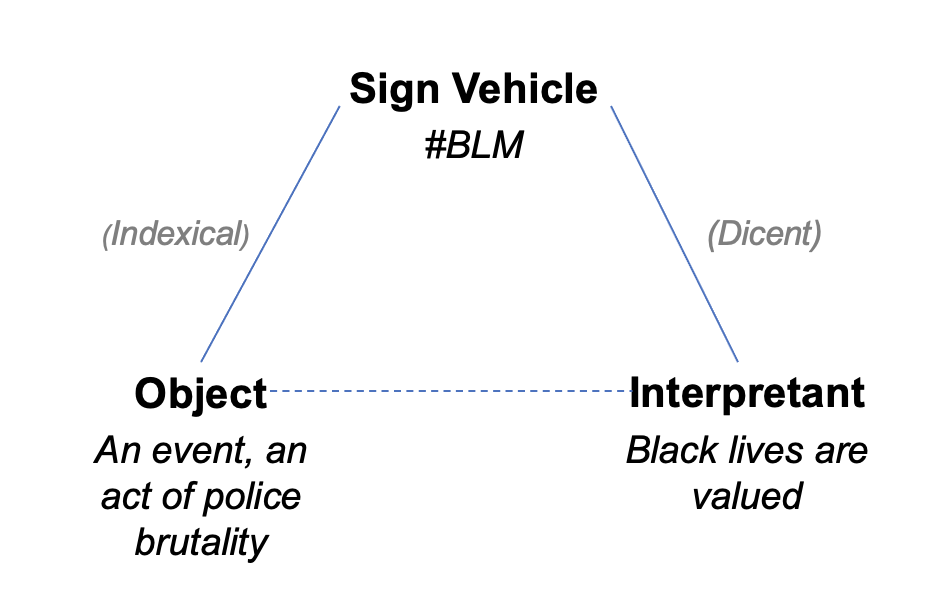

The sign-vehicle is the instantiation or usage of the hashtag #BLM, and it indexically points to an act of police brutality in the United States, such as the murder of George Floyd in the summer of 2020 as previously mentioned. The sign-vehicle references an occurrence in the past. In this scenario then, the relationship between the sign-vehicle and the interpretant is a dicent. The interpretant is an act of resistance through the proposition that Black lives are valued despite systemic racism. 

However, as I am exploring how a sign’s meaning evolves over time, I hypothesize that the triadic relationship above is only specific to 2016. In 2020, I expect that the widespread protests have generated familiar, but slightly different triadic relationships. It’s hard to imagine that a sign’s meaning will remain unchanged when upwards of 16 million people are engaged in 2020 protests alone. I expect one of the possible sign-vehicle relationships to be the following in 2020:

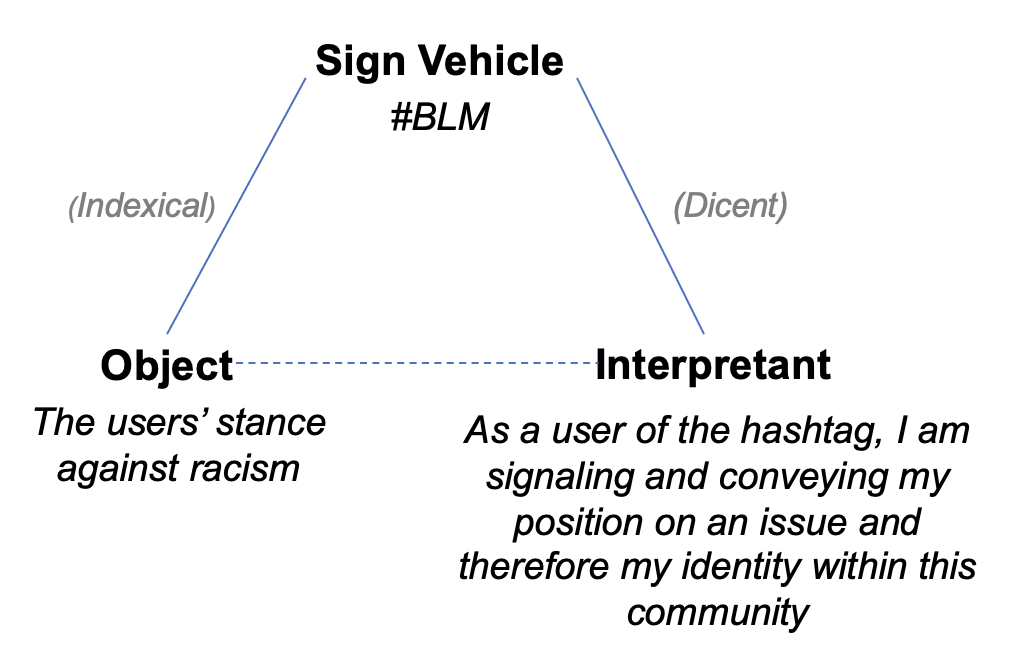

The relationship between the sign-vehicle and the object is unchanged. It remains an indexical, but instead of pointing towards acts of police brutality, the sign-vehicle indexically points towards a user’s values. Moreover, because the social movement has such a large following, I believe that the sign-vehicle will lose specificity and symbolize social activism at large. As a result, the interpretant itself shifts slightly, though its relationship with the sign-vehicle continues to be that of a dicent. By using the hashtag, users iconically mirror other users who use the hashtag, and this becomes a signal to communicate the user’s values and beliefs on the issue. By extension, the interpretant becomes political as users align themselves with a community who shares beliefs on the way things should be. In thinking back to corporate participation, businesses who use the hashtag iconcially resemble individuals who use the hashtag to point to their ethics and ultimately convey their identity as a member of this group because they share its morals. 

Before moving deeper into the analysis, I don’t believe that the second triadic diagram covers all the possible relationships in 2020. It is one possible triadic relationship. For example, I believe that by the sheer number of hashtag users and protestors in the Summer of 2020, the sign-vehicle #BLM has become a symbolic stand in for social activism and racism against Black people in general even though it originated to end police brutality against Black lives in the United States. In short, I expect the relationships between the sign-vehicle, object, and interpretant to remain the same, but the objects and interpretants will be increasingly diffuse as we move from 2016 to 2020. 

## Understanding the Data

To compare Twitter conversations around #blm in 2016 to discussions happening four years down the road, I turn to [arXiv](https://arxiv.org), an open access repository of electronic preprints owned by Cornell University. The repository has shared [tweet IDs](https://zenodo.org/record/4056563#.YCW73C1h1hE) for 41.8 million tweets from 10 million different users.

The linked Tweet ID file does not contain the actual text of the tweet or any metadata specific to it. Due to Twitter’s user guidelines, the file instead holds 41.8 million unique identifiers that are tied to an individual tweet. To retrieve the contents of the tweet and any available metadata, the IDs need to first by “hydrated.” I turn to [hydrator](https://github.com/DocNow/hydrator), an open-source application that takes in a .txt file with all the Tweet IDs that a user wishes to hydrate. From there, the application “hydrates” all the IDs by returning a .csv file with the actual tweet alongside information such as users handle, date, time, and the number of retweets, if any. 

For this project, I hydrate half a million Tweet IDs, which returned 389,000 tweets.

## Analysis

### Top Noun Plots

First, I clean my data and separate it into tweets from 2016 and tweets from 2020. In each of the respective years, I identify the top 25 nouns and plot them against their frequency along the y-axis. Identifying the top nouns is an effective approach for my research question because I am interested in the hashtag’s evolution by proxy of measuring the objects that are related to the sign-vehicle. Examining the nouns, as opposed to the adjectives, allows me to determine who, what, or when the hashtag is indexically correlated to. 

*Define function to clean up text data.*

In [11]:
def data_cleaner(dataframe):
    """Replaces words, removes hyperlinks, and creates a new column
    with the year in which the tweet was tweeted.
    """

    df = dataframe.copy()

    # Replaces cops and officers to police 
    replacements = {
        'text': {
            'cops': 'police',
            'cop': 'police',
            'officers': 'police',
            'officer': 'police'    
        }
    }    
    df.replace(replacements, regex=True, inplace=True)

    # Replaces hyperlinks with an empty string character
    link_format = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    df['text'] = df['text'].str.replace(link_format, '') 
    
    # Creates new column that is just the year 
    df['year'] = [date[-4:] for date in df['created_at']]

    return df

*Store cleaned data to a new variable.*

In [12]:
blm = data_cleaner(blm)

*Define function to split the data by year.*

In [13]:
def data_splitter(dataframe, year):
    """Splits tweet dataframe by a specified year."""

    df = dataframe.copy()

    df = df[df['year'] == year]
    
    return df 

*Split data and assign to new objects.*

In [14]:
blm_2020, blm_2016 = [data_splitter(blm, year) for year in ['2020', '2016']]

*Define stop words and instantiate NLTK's TweetTokenizer function.*

In [15]:
blm_stops = [
    '#blacklivesmatter',
    '#blklivesmatter',
    '#bluelivesmatter',
    '#alllivesmatter',
    'people',
    'movement',
    'lives',
    'matter',
    'blue',
    'blm',
    'time',
    'today',
    'rt',
    '…',
    '’',
    'thanks',
    'oop',
    'real',
    'bow',
    'tadaaaaaan',
    'bravo',
    'stfu',
    'real',
    'pussy',
    'cc'
]
stop_words = (nltk.corpus.stopwords.words('english')
              + list(string.punctuation)
              + blm_stops)
    
tknzr = TweetTokenizer()

*Dr. Clindaniel defined these functions in class which tokenize text and return a plot of the top nouns.*<sup>9</sup>

In [16]:
def pos_tag(text):
    """Returns a tokenized word alongside its corresponding part of speech tag."""
    
    # Tokenize words, keeping only those tokens that don't appear in the stop words we defined
    tokens = [i for i in tknzr.tokenize(text.lower()) if i not in stop_words]
    
    # Label parts of speech automatically
    pos_tagged = nltk.pos_tag(tokens)
    
    return pos_tagged


def plot_top_pos(series, data_description, pos):
    """Plots the top 25 words tagged to a part of speech."""

    # Apply part of speech tagger to any Pandas series passed through 
    pos_tagged = series.apply(pos_tag)

    # Extend list so that it contains all words/parts of speech
    pos_tagged_full = []
    for i in pos_tagged:
        pos_tagged_full.extend(i)
        
    # Create frequency distribution of different nouns and plot
    fd = nltk.FreqDist(word + "/" + tag for (word, tag)
                       in pos_tagged_full if tag[:2] == pos)
    fd.plot(25, title='Top 25  ' + data_description)
    
    return

*Plot top nouns from 2016.*

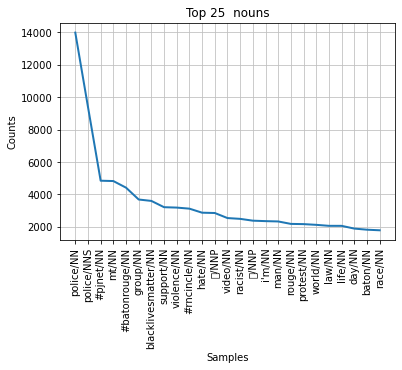

In [17]:
plot_top_pos(blm_2016['text'], 'nouns', 'NN')

From the top noun plot in 2016, it’s immediately clear that the usage of the hashtag #BLM is a replica of a legisign because the digital sign-vehicle follows the same convention every time it is used. It isn’t coincidental that usage of the hashtag tends to generate immense online interest (as seen in the Google trends time series plot previously displayed. In looking into the actual content of the tweets we see that the sign-vehicle, the hashtag #BLM, is indexically pointing to acts of police brutality. The nouns “police,” “Baton Rouge,” (where 37-year-old Alton Sterling was shot dead by two officers) “violence,” and “racist” emerge from the field in 2016. Ultimately, the plot above supports the idea that Twitter users are using the hashtag in accordance with how BlackLivesMatter is typically associated with criminal justice reform. There is a connection between Twitter usage and the movement’s goals. 

Importantly, the replication of the legisign falls in line with the academic understanding of the movement. Alvin B. Tillery Jr. performed a content analysis into the tweets of six social movement organizations and characterized BlackLivesMatter as a “new social movement.” In other words, Tillery argues that Black Lives Matter as we know it today more closely resembles movements such as Occupy Wall Street and the explosive protests in Egypt and Brazil as opposed to the Civil Rights Movement of the 1960s.<sup>10</sup> To back up his claim, Tillery analyzed prominent Black Lives Matter Twitter accounts at the global level, Chicago, DC, Los Angeles, NYC, and Ferguson between 2015 and 2016 by coding tweets into three categories: expressive tweets (conveying emotions such as anger and sadness), informational tweets (sharing local and national news items), and resource mobilization tweets (requesting items such as coffee and deodorant). Tillery found that 42% of his tweet sample could be characterized as expressive, 39% as informational, and 19% as resource mobilization. New social movements prioritize the first two types of tweets, whereas the social movements that emerged in the United States in the 1960s underscored resource mobilization. 

This finding is important both from the perspective of semioticians and individuals who study social movements. For semioticians, it’s clear that the sign-vehicle among everyday Twitter users is being used in accordance with how leaders in major cities use the hashtag on Twitter. For Tillery, the movement in 2016 is primarily focused on expression and information sharing, and we see that priority reflected in the plot with nouns such as “police” and “videos” which likely spread news events alongside “hate” which falls into the expressive category Tillery highlighted. For individuals who study social movements, this empirical evidence begets more questions. What drives the success of a movement? Does it require the coordination of human capital or is it key to spread awareness? Perhaps both?

As a reminder, I’m interested in how the objects of the sign-vehicle may change (or remain the same) over time. Below I plot the top 25 nouns related to the hashtag #blm in 2020. 

*Plot top nouns from 2020.*

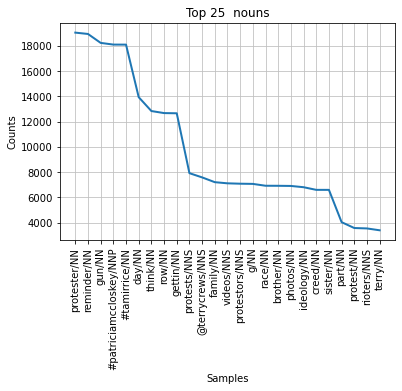

In [18]:
plot_top_pos(blm_2020['text'], 'nouns', 'NN')

In analyzing the plot above, the overall story is consistent even four years down the road. The hashtag #BLM is still used to address police violence against Black people in the United States as we see “#tamirrice” (a 12-year-old Black boy killed by a Timothy Loehmann, a police officer), “gun”, and “race” emerge as top nouns in the year. Notably, information sharing appears to remain important as the words “videos” and “photos” make the cut. However, the word “police” is no longer present on this plot. Instead, we see words such as “protestor”, “ideology”, “patriciamccloskey”, and “@terrycrews” appear in its place. I believe that this provides evidence for my hypothesis that the social movement, along with its sign-vehicle, has taken on slightly more nuanced meanings over time. The objects are not only events or acts of police violence, but the objects refer to the diffuse acts of racism and prejudice against Black people in the United States that I had expected in my hypothesis. In June of 2020, Patricia McCloskey and her husband pointed a handgun and an assault rifle at a group of non-violent Black Lives Matter protestors who had entered a private gated community in St. Louis Missouri. Terry Crews suggested that Black Lives Matter could morph into Black Lives Better, weary of Black supremacy (which provides an individual instance where there is a disconnect in the interpretant for Terry Crews and the movement’s call for equality and equity). Moreover, with the increasing use of the nouns “protestor” and “ideology”, it’s possible that the usage of the hashtag #blm in 2020 also indexically points to the users’ agency, values, and beliefs. By using the hashtag, users point to their ideology and consequently establish their identity by positioning themselves within a community along a spectrum of beliefs. No longer is the interpretation limited to the significance of Black lives, but users are also signifying who they align with politically and ideologically.

A couple of social theories serve as potential explanations for the diverse sign-vehicle objects in 2020 as well as the emphasis on establishing one’s identity through usage of the hashtag. First, sociologists Herbert Blumer<sup>11</sup>  and Charles Tilly<sup>12</sup>  break social movements down into 5 stages shown below: 

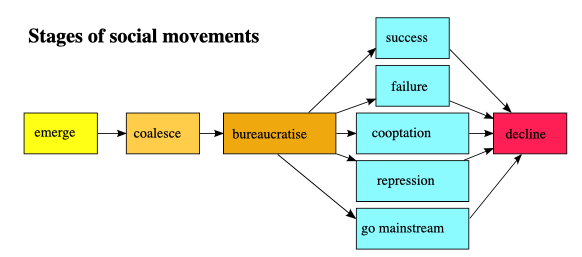

It’s possible that Black Lives Matter is in a stage of co-optation where members of a social movement inevitably shift away from the original goals of the movement. The evidence from the two plots suggests that a form of co-optation is happening. While the goals are large are still focused on combatting anti-Black racism, the forms of racism are no longer limited to police brutality as we’ve seen the nouns shift from police towards people like Patricia McCloskey and Terry Crews. Marcia Mundt, Karen Ross, and Charla M. Burnett provide qualitative evidence in their study analyzing how social media can facilitate and hinder the scaling up of Black Lives Matter.<sup>13</sup>  They find “given the accessibility of social media platforms and the ease with which symbols can be adopted, the hashtag and the name can be applied to many types of initiatives that may not fully align with the movement’s central platform.” To reiterate, I don’t believe that the data here show that the hashtag #BLM has morphed into an unrecognizable sign-vehicle, but my point is that the movement has entered a phase where social media has made it easier for individuals to participate and assign new objects to the sign-vehicle that add more nuance to the reproduction of the legisign. 

Further, the emphasis on protestors, ideologies, and by extension, sign-vehicles as identities, may be explained by new social movements theory which build upon postmaterialism.<sup>14</sup>  No longer are social movements the product of materialistic economic class concerns, but they’re motivated by identities and self-expression with issues related to human rights. As a reminder, Tillery used computational methods to argue that Black Lives Matter more closely resembles new social movements, and I echo his proposition with postmaterialist theory as a foundation. Not only does Black Lives Matter empirically mimic other new social movements, but qualitatively it is an identity movement. Its primary goals are not explicitly fueled by class (though undeniably class and race are intertwined). Because new social movements centralize identity, we can expect participants to utilize the sign-vehicle as an expression and formulation of their identities. The use of the nouns “protestor” and “ideology” suggest that participation and usage is an indexical call to self-identification. 

### TF-IDF Plots

In addition to plotting nouns individually, I turn to a TF-IDF analysis. Here I am interested in looking at how relevant certain words are in 2016 and in 2020. Before creating the plots, I perform a little data cleaning below.

*Define a helper function that will remove handles from the text of a tweet.*

In [19]:
def remove_pattern(input_txt, pattern):
    """Helper function to remove a user-specified pattern
    from text data.
    """
    
    # Search for pattern. If found, pattern is replaced with an empty string character
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

*Create new column in each the 2016 and 2020 dataframe that contains the content of the tweet without any user handles.*

In [20]:
blm_2016['text_no_users'] = np.vectorize(remove_pattern)(blm_2016['text'], "@[\w]*") 
blm_2020['text_no_users'] = np.vectorize(remove_pattern)(blm_2020['text'], "@[\w]*") 

*Dr. Clindaniel defined these functions in class, and I will use them to return a TF-IDF plot for tweets in each year.*<sup>15</sup>

In [21]:
def get_wordnet_pos(word):
    
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': nltk.corpus.wordnet.ADJ,
        'N': nltk.corpus.wordnet.NOUN,
        'V': nltk.corpus.wordnet.VERB,
        'R': nltk.corpus.wordnet.ADV
    }

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)


def get_lemmas(text):
    """Tokenizes a series of text and returns their corresponding
    lemmas.
    """

    # Tokenize text if token is not in my defined stop words
    tokens = [i for i in tknzr.tokenize(text.lower()) if i not in stop_words]
    
    # Lemmatize tokens
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t))
              for t in tokens]

    return lemmas


def plot_top_tfidf(series, data_description, n=20):
    """Returns a TF-IDF plot."""
    
    # Get lemmas for each row in the input series
    lemmas = series.apply(get_lemmas)
    
    # Initialize series of lemmas as Gensim Dictionary
    dictionary = corpora.Dictionary([i for i in lemmas])

    # Convert dictionary into a bag of words 
    bow_corpus = [dictionary.doc2bow(text) for text in lemmas]
    
    # Calculate TF-IDF based on bag of words and return weights
    tfidf = models.TfidfModel(bow_corpus)
    tfidf_weights = {}
    for doc in tfidf[bow_corpus]:
        for ID, freq in doc:
            tfidf_weights[dictionary[ID]] = np.around(freq, decimals=2)

    # Grab those with the largets TF-IDF values
    top_n = pd.Series(tfidf_weights).nlargest(n)
    
    # Plot the top n weighted words
    plt.plot(top_n.index, top_n.values)
    plt.xticks(rotation='vertical')
    plt.title('Top {} Lemmas (TFIDF) for '.format(n) + data_description);
    
    return

As with the top nouns analysis, I begin by looking at the 2016 data.

*Plot TF-IDF for 2016.*

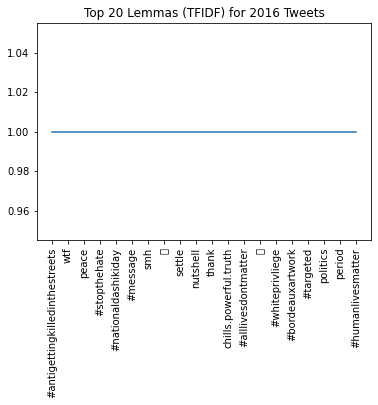

In [22]:
plot_top_tfidf(blm_2016['text_no_users'], '2016 Tweets')

As we can see from the plot above, the hashtags “#aintgettingkilledinthestreets” and “#whiteprivilege” tell a consistent story. The hashtag #blm is used in reference to incidents where police officers have murdered Black men, and its interpretant continues to be that Black lives are valuable despite systemic racism. The abbreviations and terms “wtf”, “smh”, and “chills.powerful.truth” also reflect Tillery’s argument that Black Lives Matter is a new social movement where the expression of feelings take center stage over resource mobilization. These terms clearly convey how Twitter users are responding and reacting (with shock and anger )to events. 

Next, I look at the top lemmas in 2020.  

*Plot TF-IDF for 2020.*

In [ ]:
plot_top_tfidf(blm_2020['text_no_users'], '2020 Tweets')

In looking at the TF-IDF plot 4 years later, it’s not a complete surprise that the lemmas are different. We saw something similar when comparing the two years in the top noun plots. It’s evident that the hashtag is still being used to convey anger as we see the phrase “afuckingain” to express exhaustion at continued acts of police brutality as we see the hashtag #sayhername being a reference to Breonna Taylor, a Black woman who was murdered by police officers while she was sleeping. However, hashtags such as “#biden2020landslide”, “politics,” and “ally” notably appear in this plot. These terms suggest that the sign-vehicle, #blm, has taken on new meanings. Not only are users using the hashtag to stand up to police brutality, but there’s evidence to suggest that the sign-vehicle symbolizes one’s political beliefs and ideologies. The word “ally” stands out the most as it’s possible that users are using the hashtag to also communicate who they are. In other words, they are supporters of the movement, reflecting the idea that I had mentioned in the introduction. It’s possible that companies – or individuals – are using the hashtag to take a stance on the issue which can either be used genuinely or for the pursuit of greater social capital. 

### An Alternative Explanation?

Before continuing my analysis, I am going to pause and address a possible alternative explanation. 

I argue that the interpretant (Black lives are important despite continued violence) is clear, but it’s worth mentioning that this interpretation of the sign-vehicle is not universal. I hinted at this idea of a disconnect when discussing Terry Crew’s views. He provides an instance in which the hashtag #BLM was being interpreted not as Black lives are important and need to be highlighted in the face of system racism, but instead as Black lives are superior to all other lives. Though Terry Crews is only an individual, we see evidence that more Twitter users may feel the same way in the 2016 TF-IDF plot with the appearance of the hashtag #humanlivesmatter. Hashtags like these are similar to #bluelivesmatter and #alllivesmatter which have risen in response to my sign-vehicle of interest. These hashtags have become commonplace retorts to #BLM to communicate the idea that Black lives are not the only valuable lives. It’s evident, then, that users of the hashtags #bluelivesmatter and #alllivesmatter have a disconnect with the interpretant of #BLM. They’re interpreting #BLM as a hashtag that supposedly expresses the supremacy of Black lives, and they are responding to the misinterpretation by stating that *all lives* – not only Black lives – are important. 

To respond to this alternative interpretation, I turn back to the plots produced above. The overwhelming majority of users who are tweeting with the hashtag are referencing acts of police brutality, the deaths of Black people, and systemic racism. Absent from the plots are words that portray Black supremacy or superiority. The hashtag #BLM centers Black lives in a society where they are often vulnerable to systemic forces. Using hashtags such as #alllivesmatter and #humanlivesmatter reinforces color blind racism. In advocating for a country devoid of race, we ignore the myth of meritocracy and fail to acknowledge the privileges from which we benefit.<sup>16</sup>  In other words, we disregard how race shapes our economic outcomes<sup>17</sup>  as descendants of enslaved people have less intergenerational wealth than individuals whose ancestors were not enslaved. By overlooking the historical context, we give up the opportunity to write effective policies that address systemic issues in which individuals are unable to overcome independently. 

### Topic Modeling Plots

For the next part of my analysis, I move away from looking at individual words, and instead use latent dirichlet allocation to create groups of topics that best represent what users are tweeting about in regards to #blm in 2016 and in 2020. Before plotting, I utilize Dr. Clindaniel's functions to determine the ideal number of topics.<sup>18</sup> 

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """Computes Coherence values for LDA models with differing numbers of topics.
    Returns list of models along with their respective coherence values (pick
    models with the highest coherence)
    """
    
    # Create empty lists to store values 
    coherence_values = []
    model_list = []
    
    # For loop to create LDA models using different numbers of topics 
    for num_topics in range(start, limit, step):
        model = models.ldamulticore.LdaMulticore(corpus=corpus,
                                                 id2word=dictionary,
                                                 num_topics=num_topics,
                                                 workers=8)
        
        # Append model and corresponding model scores to empty lists 
        model_list.append(model)
        coherence_model = models.coherencemodel.CoherenceModel(model=model, 
                                                               corpus=corpus,
                                                               dictionary=dictionary,
                                                               coherence='u_mass')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values


def coherence_plot(dataframe):
    """Returns a plot showing the coherence scores vs. number of topics."""
    
    df = dataframe.copy()
    
    # Lemmatize tweet content
    lemmas = df['text_no_users'].apply(get_lemmas)
    
    # Initialize Gensim dictionary and convert dictionary to bag of words.
    dictionary = corpora.Dictionary([lemma for lemma in lemmas])
    bow_corpus = [dictionary.doc2bow(text) for text in lemmas]
    
    # Get list of models and coherence scores
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                            corpus=bow_corpus, 
                                                            texts=lemmas, 
                                                            start=2, limit=40, step=6)
    
    # Produce plot of coherence values against number of topics
    plt.plot(range(2, 40, 6), coherence_values)
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence score')
    plt.legend(('coherence_values'), loc='best');

*Plot coherence score as a function of the number of topics.*

In [ ]:
coherence_plot(blm_2016)

The coherence plot shows that four topics will yield the greatest level of topic coherence.

*Define function to return a creative topic modeling plot using bits from Dr. Clindaniel's lecture<sup>19</sup> and Towards Data Science.<sup>20</sup>*

In [ ]:
def topic_modeler(dataframe):
    """Creates topic models through LDA and returns plot showing topics."""

    df = dataframe.copy()

    # Lemmatize tweet content
    lemmas = df['text_no_users'].apply(get_lemmas)

    # Initialize lemmas into a Gensim dictionary
    id2word = corpora.Dictionary([lemma for lemma in lemmas])
    
    # Store lemmas into a variable named texts
    texts = lemmas
    
    # Convert dictionary into bag of words
    corpus = [id2word.doc2bow(text) for text in texts]
    
    # Run LDA model with five topics
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4)
    
    # Create plot from our LDA model
    plot = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    
    return plot

# Initialize interactive plot for Jupyter Notebook
pyLDAvis.enable_notebook()

*Explore topics for tweets in 2016.*

In [ ]:
topic_modeler(blm_2016)

Note: I use the default relevance parameter of lambda to 0.6, suggested by the researchers behind `LDAvis`.<sup>21</sup>

In looking at the interactive visual above, I immediately notice that topic 1 and 2 overlap which suggests that the topics of discussion are closely related.<sup>22</sup>  Topic 1 represents nearly a third of all tokens, and LDA reveals that the dominant topic is, again, about police brutality as we see the words “police,” “kill,” and “racist”. While topic isn’t as clear as top 1, it’s evident that the focus of the conversation is still on police officers. Notably absent are the presence of terms that suggest the racial hierarchies that users of the hashtag #alllivesmatter fear which refutes the alternative interpretation of #BLM brought up in the previous section. 

Topic 4 is located far away from topic 1 and 2, suggesting that the conversation is different. The use of the hashtag #policelivesmatter suggests that these users are not interpreting or using the hashtag #BLM correctly. This subgroup of users is disconnected from the intended dominant interpretant put forth by users who tweet topics related to topic 1 and topic 2. 


Next, I create a similar visual for tweets in 2020.

*Explore topics for tweets in 2020.*

In [ ]:
topic_modeler(blm_2020)

In looking at the topics in 2020, we can see that the topics no longer overlap at all, suggesting that conversations may be more diverse overall relative to the plot generated from 2016 data. Taking a deeper look at topic 1, I see that words like “justice,” “black,” “police,” and “murder” are still dominant, suggesting that the #BLM is still about criminal justice reform. Interestingly, though, the word “democrat” appears frequently within this topic suggesting that the usage of #BLM is also becoming way to signal political and ideological alignment, supporting what I had seen in the TF-IDF analysis. Taking a deeper look at topic 2, we also see words such as “protester,” “protest,” and “ideology” which also suggests that #BLM is used to communicate one’s values and beliefs in 202. Moreover, as “#patriciamccloskey” appears alongside “#tamirrice”, it’s evident that #BLM is no longer solely about police violence, but also the ways in which everyday people behave violently as well. 

### Conclusion

My analysis reveals how a sign-vehicles do not need to remain static over time. The indexical objects in which they point to shift and evolve, and as a result, produce new and slightly different interpretants. Within the context of my topic, the hashtag #BlackLivesMatter primarily indexed police brutality in 2016 which rallied calls to reform the criminal justice system by emphasizing the value of Black lives. In 2020, the over-arching meaning of the hashtag #BlackLivesMatter remained consistent as a mechanism to speak out against anti-Black racism, but my analysis shows that the hashtag also took on new meanings on top of its original purpose. Police were no longer centered in 2020, but protestors, non-police actors, and politics took the spotlight. These new objects demonstrate how the hashtag #BlackLivesMatter took on a variety of new, but related meanings. By indexing non-police actors, the hashtag also speaks to other forms of racism against Black people in the United States. It’s also people like Patricia McCloskey and her husband who view protesters as threats as they point firearms in their direction. It’s also the fear that Black Lives Matter will turn into Black Lives Better that justifies continued oppression which is rooted in the belief that Black people are threats. Moreover, the increasing mentions of protests and politics when using the hashtag #BlackLivesMatter points to the ways in which the sign-vehicle is used to establish a user’s identity. The hashtag has become a symbol of activism in general and its usage positions a user along an ideological spectrum. 

While my conclusion has primarily focused on the hashtag as an object of study for semiotics, the study also complicates the social science’s understanding of social movements, challenges the systems of oppression in our country, and adds to the study of digital cultures. As our interactions increasingly take place on social media, social scientists need to continuously re-analyze the lifespan of a social movement. While social movements in the 1960s emphasized the importance of resource mobilization, social media was not yet available as a tool to rapidly spread information and feelings. Social scientists need to include social media as a mechanism that facilitates or hinders the goals of a movement. Moreover, the analysis revealed how racism and systems of power are conceptualized in this country. Racism is about larger structures such as the criminal justice system, but it’s also about how we as individuals reinforce and uphold harmful conceptions of race that are deeply rooted in racism. Finally, this study adds to practices of studying digital culture. Culture is not this amorphous being. In using computational tools, we can quantify and identify the meanings and understandings behind cultural artifacts. No longer do we have to rely on a minor segment of “elites” to determine culture. No longer do we have to refer qualitatively to what our immediate social circles are saying to conceptualize culture. Twitter analyses allow us to understand what how our wider society creates cultural meaning through the replication of legisigns.

-----------------
<sup>1</sup>Elizabeth Day, “#BlackLivesMatter: the birth of a new civil rights movement,” *The Guardian*, July 19, 2015, https://www.theguardian.com/world/2015/jul/19/blacklivesmatter-birth-civil-rights-movement

<sup>2</sup>Shannon Luibrand, “How a death in Ferguson sparked a movement in America,” *CBS News*, August 15, 2015, https://www.cbsnews.com/news/how-the-black-lives-matter-movement-changed-america-one-year-later/

<sup>3</sup>Meredith Deliso, “Suspect charged with murder, kidnapping in Oluwatoyin Salau case,” *ABC News*, June 16, 2020, https://abcnews.go.com/US/suspect-charged-murder-kidnapping-oluwatoyin-salau-case/story?id=71279201

<sup>4</sup>Eric Peterson, “On Performative Wokeness,” *Medium* (blog), accessed March 15, 2021, https://tawdry-hepburn.medium.com/on-allyship-and-performative-wokeness-30581808bf8b

<sup>5</sup>Raymond Williams, *The Long Revolution* (London: Chatto & Windus, 1961), 57.

<sup>6</sup>Charles Sanders Peirce, “Logic as Semiotic: Theory of Signs,” in *Philosophical Writings of Peirce*, ed. Justus Buchler (New York: Dover Publications, 1955), 102.

<sup>7</sup>Monica Anderson, “The hashtag #BlackLivesMatter emerges: Social activism on Twitter,” Pew Research Center,  last modified August 15, 2016, https://www.pewresearch.org/internet/2016/08/15/the-hashtag-blacklivesmatter-emerges-social-activism-on-twitter/ 

<sup>8</sup>Jon Clindaniel, *The Inka Writing System: An Exploration of Khipu Sign Conventions* (n.p.: n.d.), 60.

<sup>9</sup>Jon Clindaniel, "Identification of Online Fashion Sign Relationships," MACS 40400: Computation and the Identification of Cultural Patterns (hands-on class lecture, University of Chicago, Chicago, IL, February 4, 2021).

<sup>10</sup>Alvin B. Tillery, “What Kind of Movement Is Black Lives Matter? The View from Twitter,” *The Journal of Race, Ethnicity, and Politics* 4, no. 2 (Summer 2019): 297-323, https://doi.org/10.1017/rep.2019.17.

<sup>11</sup>Herbert Blumer, “Collective Behaviour,” in *Principles of Sociology*, ed. Alfred McClung Lee, (New York: Barnes & Noble, 1969), 67-121. 

<sup>12</sup>Charles Tilly, *From Mobilization to Revolution* (New York: Random House, 1978), 100.

<sup>13</sup>Marcia Mundt, Karen Ross, and Charla M. Burnett, “Scaling Social Movements Through Social Media: The Case of Black Lives Matter,” *SAGE Journals* 4, no. 4 (Fall 2018): 10-11, https://doi.org/10.1177/2056305118807911

<sup>14</sup>Peter Miller, “Postmaterialism and Social Movements,” in *The Wiley-Blackwell Encyclopedia of Social and Political Movements*, ed. David A. Snow, Donatella Della Porta, Bert Klandermans & Doug McAdam, (New Jersey: John Wiley & Sons, 2013). 

<sup>15</sup>Jon Clindaniel, "Identification of Online Fashion Sign Relationships," MACS 40400: Computation and the Identification of Cultural Patterns (hands-on class lecture, University of Chicago, Chicago, IL, February 4, 2021).

<sup>16</sup>Stephanie M. Wildman, Privilege revealed: how invisible preference undermines America (New York: New York University Press, 1996), 7-24.

<sup>17</sup>Raj Chetty, Nathaniel Hendren, Maggie R. Jones, and Sonya Porter, “Race and Economic Opportunity in the United States: An Intergenerational Perspective,” *Quarterly Journal of Economics* 135, no. 2 (Spring 2020) 731, https://doi.org/10.1093/qje/qjz042.

<sup>18</sup>Jon Clindaniel, "Interpreting Music Signs," MACS 40400: Computation and the Identification of Cultural Patterns (hands-on class lecture, University of Chicago, Chicago, IL, February 18, 2021).

<sup>19</sup>Ibid.

<sup>20</sup>Shashank Kapadia, “Topic Modeling in Python: Latent Dirichlet Allocation (LDA),” *Towards Data Science* (blog), accessed March 17, 2021, https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

<sup>21</sup>Carson Sievert and Kenneth E. Shirley, "LDAvis: A method for visualizing and interpreting topics," *Association for Computational Linguistics*, (Summer 2014) 68, https://doi.org/10.3115/v1/W14-3110 

<sup>22</sup>Lucia Dossin, "Experiments on Topic Modeling - PyLDAvis," *Object-Oriented Subject* (blog), accessed March 18, 2021, https://www.objectorientedsubject.net/2018/08/experiments-on-topic-modeling-pyldavis/